# ENCARGO UNIDAD 2 PARTE 1



---

* Nombre: Daniela Ponce

# Sección 1 - Aplicar metodo kmeans




---

Usando el data set Wine.csv, antes de usar el metodo Kmeans debermos limpiar la dataset con la siguiente rutina.

    1- Carga y revision superficial (cantidad de filas y columnas, y tipos de datos) del dataset.
    2- Eliminar las columnas que tengan poco aporte predictivo.
    3- Revisar la existencia de valores nulos en el dataset.
    4- Reemplazar los valores nulos dependiendo del tipo de datos, de ser una variable cuantitativa sera cambiado por la media y en caso de ser una variable cualitativa era cambiado por la moda.(Omitida al no existir datos nulos)
    5- Revisar las estadisticas de las columnas restantes.
    6- Transformar las variables cualitativas a numericas, ya que asi estas podran ser usadas en algoritmos mas adelante. (Omitida al no existir datos cualitativos)
    7- Guardar los datos limpios y normalizados en el dataset
    8- Realizar un mapa de calor para ver la correlacion entre nuestros valores.

Cargar las librerias a usar

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [49]:
data1 = pd.read_csv("Wine.csv") 

In [50]:
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [51]:
data1.shape

(178, 14)

In [52]:
data1.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [53]:
eliminar = ['Customer_Segment']
data1 = data1.drop(eliminar, axis = 'columns')
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data1.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Al no existir valores nulos de modo que se omite el paso 4.

In [8]:
data1.describe(include='all')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
data1.to_csv('Wine.csv', index=False)

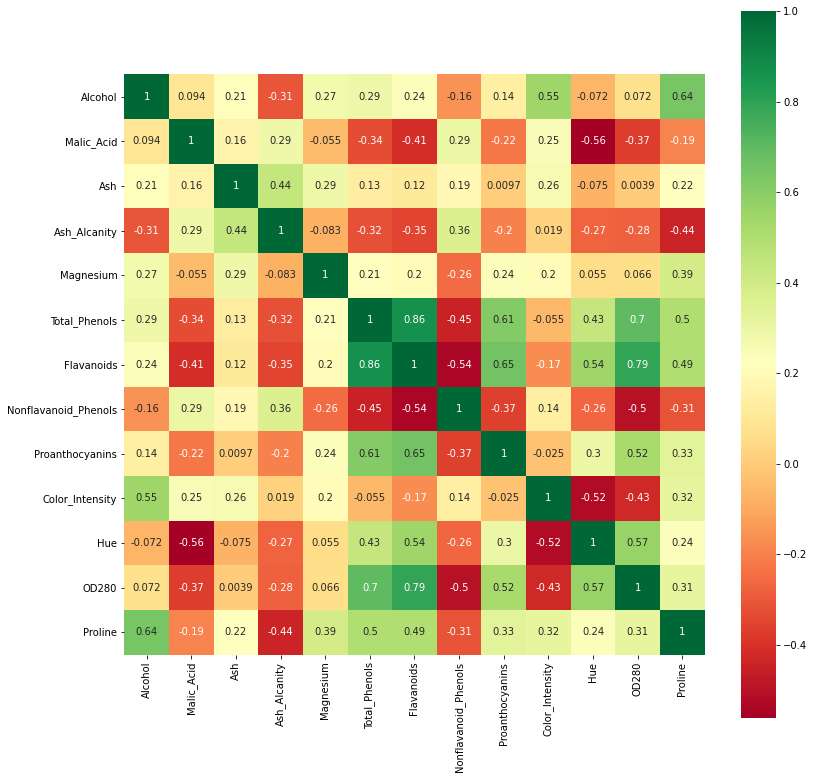

In [10]:
plt.figure(figsize=(13,13))
p=sns.heatmap(data1.corr(), annot=True,cmap='RdYlGn',square=True)

Inicio del Metodo Kmeans


In [11]:
indices = [18, 69 , 150]
muestras = pd.DataFrame(data1.loc[indices], 
                       columns = data1.keys()).reset_index(drop = True)

data1 = data1.drop(indices, axis = 0)

In [12]:
data_escalada = preprocessing.Normalizer().fit_transform(data1)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [13]:
X = data_escalada.copy()

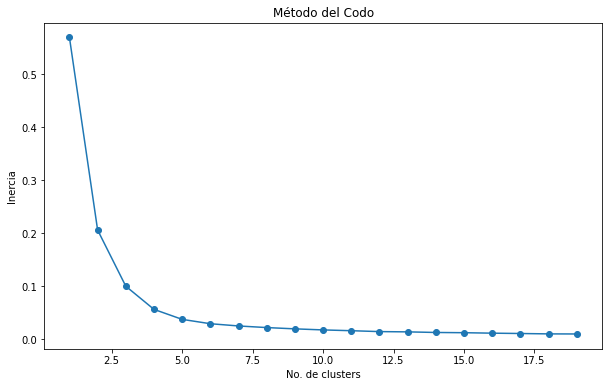

In [14]:
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
   
    inercia.append(algoritmo.inertia_)

plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

El siguiente grafico podemos apreciar como a medida que aumentan nuestros cluster el grafico la media disminuira. Con estos datos seleccionaremos como nuestro 'K' el valor de 5 al ser 'punto codo' donde nuestra curva comienza a suavisar.

In [60]:
algoritmo = KMeans(n_clusters = 5, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

In [61]:
algoritmo.fit(X)

KMeans(n_clusters=5)

In [62]:

centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [63]:
muestra_prediccion = algoritmo.predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 3
Muestra 1 se encuentra en el clúster: 4
Muestra 2 se encuentra en el clúster: 4


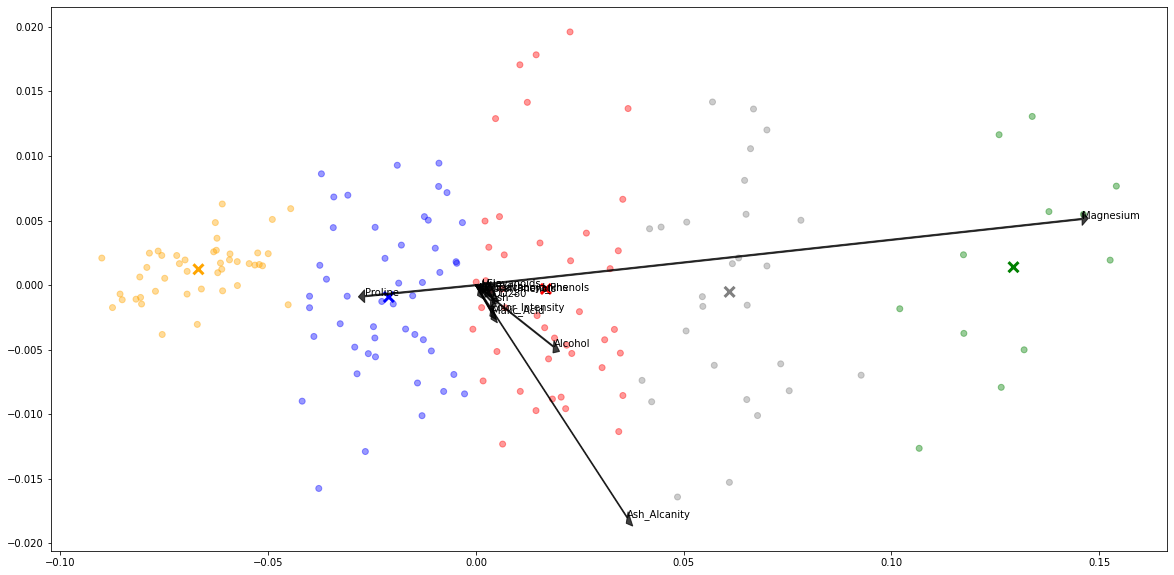

In [64]:
plt.figure(figsize=(20,10))
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

centroides_pca = modelo_pca.transform(centroides)

colores = ['blue', 'red', 'green', 'orange', 'gray']

colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data1.columns


for i in range(len(columnas)):
    
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0001, head_width = 0.001, alpha = 0.75)
 
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=1)

plt.show()

En el siguiente grafico podemos ver la distribucion de los datos de los 5 diferentes Clusters. Ademas podemos decir que una mayor cantidad de datos tiene altos indices de Proline, ademas de que mientras mas alto el proline menor es la cantidad de Magnesium. 